In [1]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import shap
from sklearn.model_selection import train_test_split
from collections import Counter

## Data Preprocessing

In [2]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Vectors/sem1.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Vectors/sem2.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Vectors/sem3.csv"
path_4 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Vectors/sem4.csv"

BHT_1 = pd.read_csv(path_1, sep=';')
BHT_2 = pd.read_csv(path_2, sep=',')
BHT_3 = pd.read_csv(path_3, sep=',')
BHT_4 = pd.read_csv(path_4, sep=',')

In [3]:
BHT_1 = BHT_1.drop(columns=['Unnamed: 0']).rename(columns={'label': 'status'})
BHT_2 = BHT_2.drop(columns=['Unnamed: 0']).rename(columns={'label': 'status'})
BHT_3 = BHT_3.drop(columns=['Unnamed: 0']).rename(columns={'label': 'status'})
BHT_4 = BHT_4.drop(columns=['Unnamed: 0']).rename(columns={'label': 'status'})

In [4]:
BHT_1 = BHT_1[BHT_1['no_passed_courses_1']<=6]
BHT_2 = BHT_2[(BHT_2['no_passed_courses_2']<=12) & (BHT_2['no_passed_courses_1']<=6)]
BHT_3 = BHT_3[(BHT_3['no_passed_courses_2']<=12) & (BHT_3['no_passed_courses_1']<=6)]
BHT_4 = BHT_4[(BHT_4['no_passed_courses_2']<=12) & (BHT_4['no_passed_courses_1']<=6)]


In [5]:
### swaping values
# after swaping, '1' is -> 'dropout' & '0'a is ->'graduate'
BHT_1['status'] = BHT_1['status'].replace([0, 1], [1, 0])
BHT_2['status'] = BHT_2['status'].replace([0, 1], [1, 0])
BHT_3['status'] = BHT_3['status'].replace([0, 1], [1, 0])
BHT_4['status'] = BHT_4['status'].replace([0, 1], [1, 0])

In [6]:
features_bht1 = BHT_1.columns[1:-1]
features_bht2 = BHT_2.columns[1:-1]
features_bht3 = BHT_3.columns[1:-1]
features_bht4 = BHT_4.columns[1:-1]

### Search Space / Param Grid 

In [7]:
from hyperopt import *
search_space = {
    'criterion': hp.choice('criterion', ['entropy']),           # Choose between Gini & Entropy
    'max_features': hp.choice('max_features', [None]),  # Feature selection method
    'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.001, 0.03),
    'ccp_alpha': hp.uniform('ccp_alpha', 0.001, 0.02),
    'class_weight': 'balanced',       # Handle class imbalance
}

## BHT semester 1

In [32]:
# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(BHT_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
hpo = ModelTrainer(random_state=48)
x, y = hpo.split_data(BHT_1, features_bht1)

Quantity of Drop Out and Degree in THL-1: 
 1: 160 | 0: 96


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 75.67trial/s, best loss: -0.797352564102564]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            10               10
	 actual 1            11               21

Model parameters:
{'ccp_alpha': 0.0029566963523896587, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.010634252104275835, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 48, 'splitter': 'best'}

Balanced acc.: 57.81250%
Validation accuracy.: 59.61538%
Sensitivity score (for 1): 65.62500%
Specificity score (for 0): 50.00000%
F1 score.: 66.66667%
False prediction: 40.38462%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:

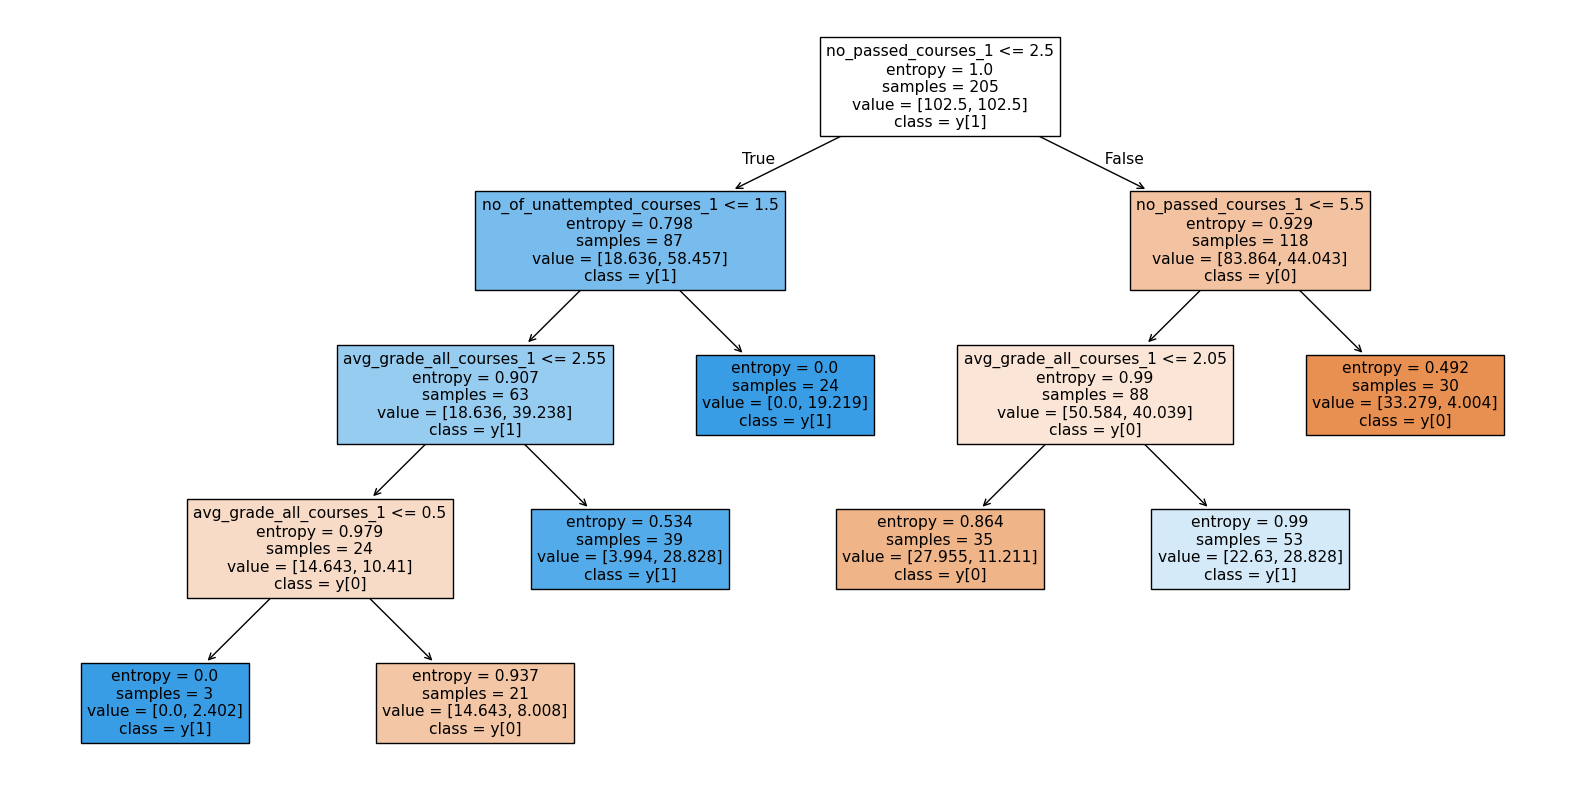

best model is from 2 fold: DecisionTreeClassifier(ccp_alpha=0.011780481968360672, class_weight='balanced',
                       criterion='entropy',
                       min_impurity_decrease=0.016015438334426254,
                       random_state=48)


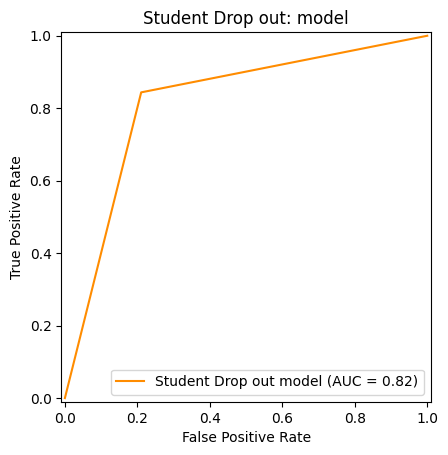

In [33]:
model_1, feature_importance_1 = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='dt',
    )

In [34]:
feature_importance_1

,Feature,Importance
0,no_passed_courses_1,0.560695
3,avg_grade_all_courses_1,0.296027
2,no_of_unattempted_courses_1,0.143277
1,no_of_failed_courses_1,0.000000


#### Shap analysis

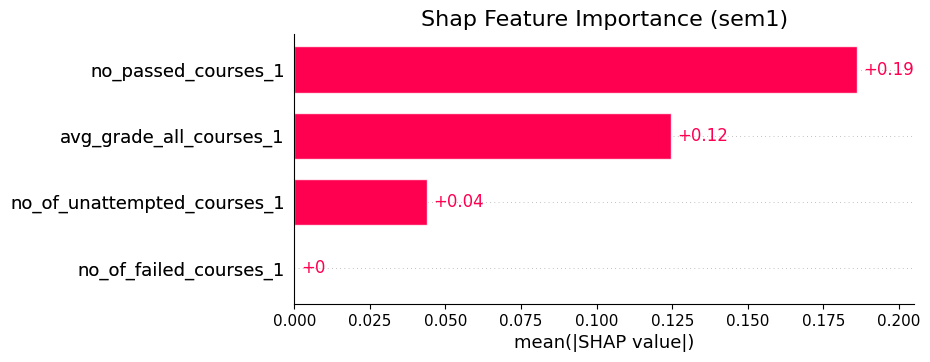

In [35]:
## Shap Global explainations
import shap
explainer = shap.TreeExplainer(model_1['model'], model_1['x_train'])
shap_values = explainer(model_1['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values[...,1])

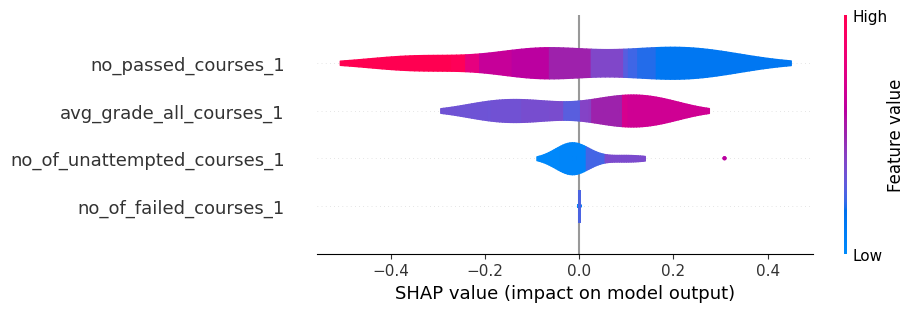

In [36]:
shap.plots.violin(shap_values[...,1], show=True)

In [37]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values[...,1], link='logit')

In [42]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=6, link='logit', model_name='dt') 

Student index 6 grades:
                             grades
no_passed_courses_1             6.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         1.8
Status: 0, Prediction: [0], Probability [0]: 0.893, Probability [1]: 0.107


In [41]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=20, link='logit', model_name='dt') 

Student index 20 grades:
                             grades
no_passed_courses_1             4.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     2.0
avg_grade_all_courses_1         2.6
Status: 1, Prediction: [1], Probability [0]: 0.440, Probability [1]: 0.560


In [40]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=15, link='logit', model_name='dt') 

Student index 15 grades:
                             grades
no_passed_courses_1             2.0
no_of_failed_courses_1          2.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         3.8
Status: 1, Prediction: [1], Probability [0]: 0.122, Probability [1]: 0.878


## BHT semester 2 

In [74]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(BHT_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=64)
x2, y2 = hpo2.split_data(BHT_2, features_bht2)

Quantity of Drop Out and Degree in THL-2: 
 1: 102 | 0: 95


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 46.66trial/s, best loss: -0.7139215686274509]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            13               06
	 actual 1            04               17

Model parameters:
{'ccp_alpha': 0.004716471881078403, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.017135741803209197, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 64, 'splitter': 'best'}

Balanced acc.: 74.68672%
Validation accuracy.: 75.00000%
Sensitivity score (for 1): 80.95238%
Specificity score (for 0): 68.42105%
F1 score.: 77.27273%
False prediction: 25.00000%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:

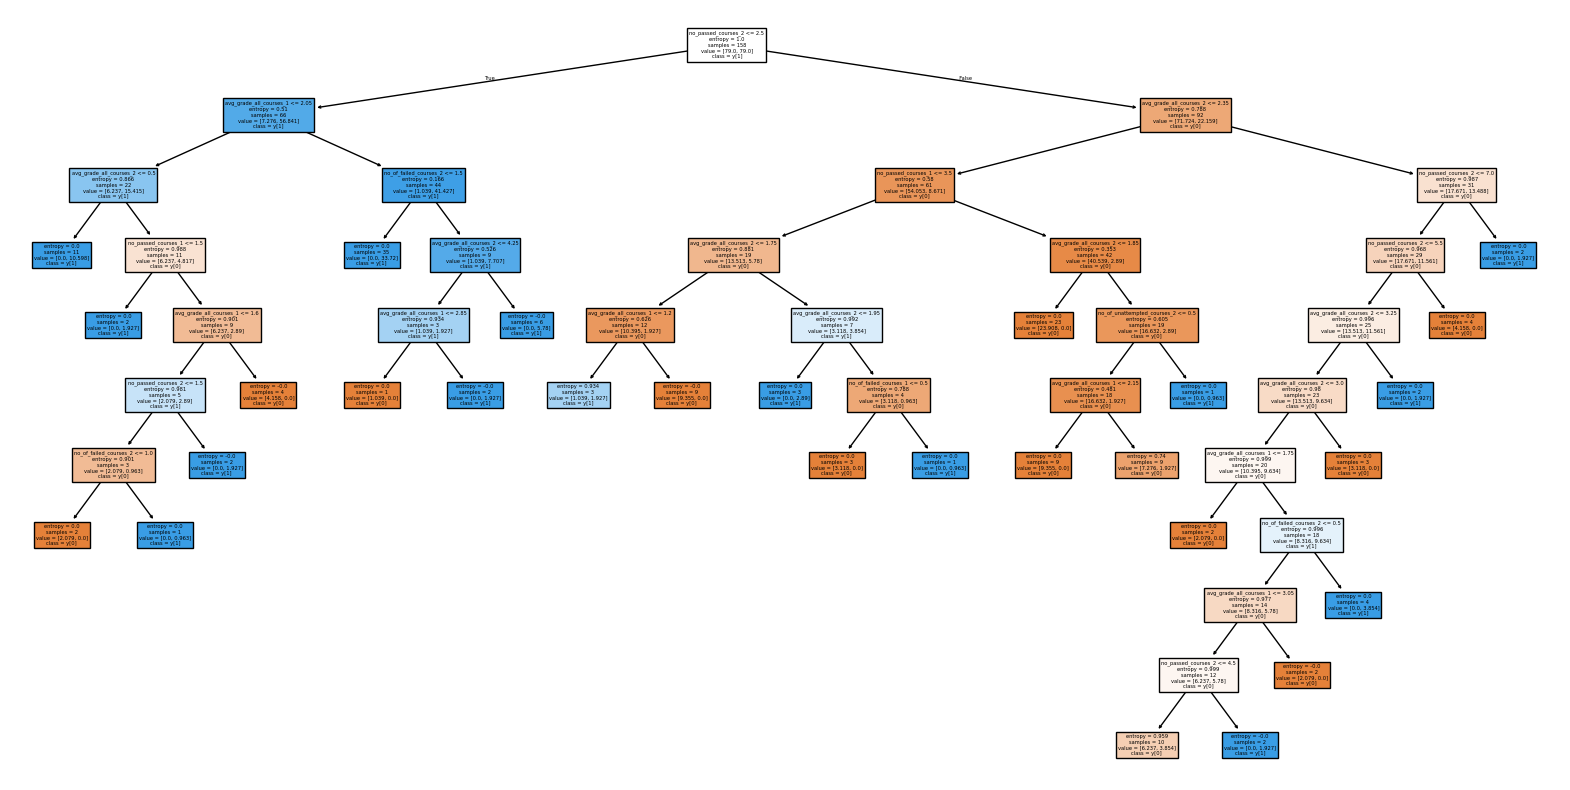

best model is from 5 fold: DecisionTreeClassifier(ccp_alpha=0.0033716977058070026, class_weight='balanced',
                       criterion='entropy',
                       min_impurity_decrease=0.010970913434871863,
                       random_state=64)


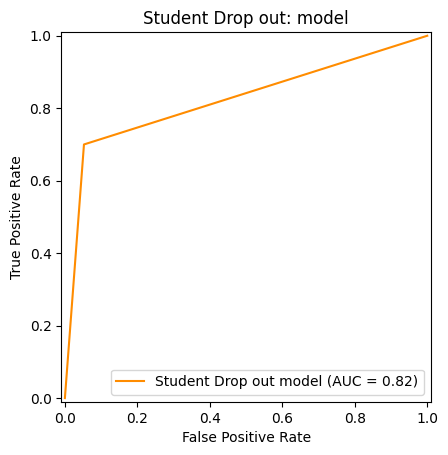

In [75]:
models_2, feature_importance_2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    folds=5,
    algo='dt'
    )

In [76]:
feature_importance_2

,Feature,Importance
0,no_passed_courses_2,0.443364
3,avg_grade_all_courses_2,0.224238
7,avg_grade_all_courses_1,0.172853
1,no_of_failed_courses_2,0.067024
4,no_passed_courses_1,0.048545
5,no_of_failed_courses_1,0.023195
2,no_of_unattempted_courses_2,0.020780
6,no_of_unattempted_courses_1,0.000000


#### Shap analysis

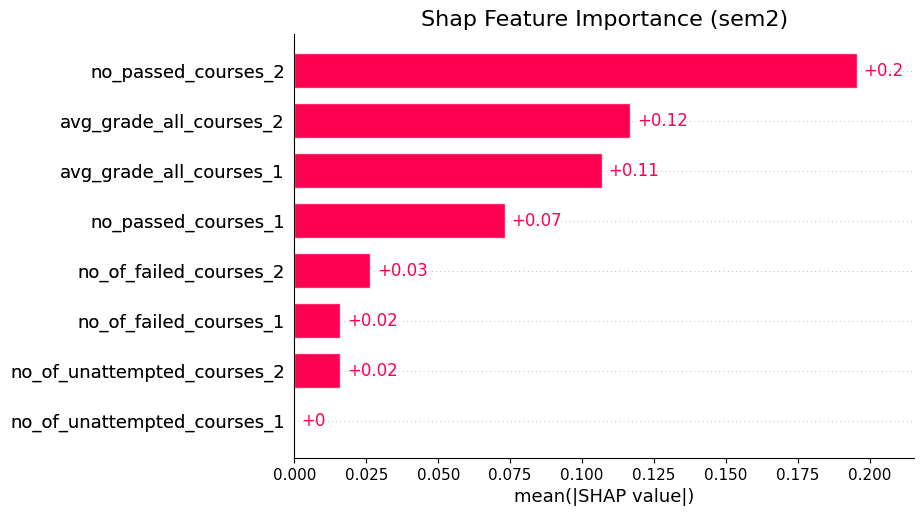

In [77]:
## Shap Global explainations
import shap
explainer2 = shap.TreeExplainer(models_2['model'], models_2['x_train'])
shap_values2 = explainer2(models_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2[...,1])

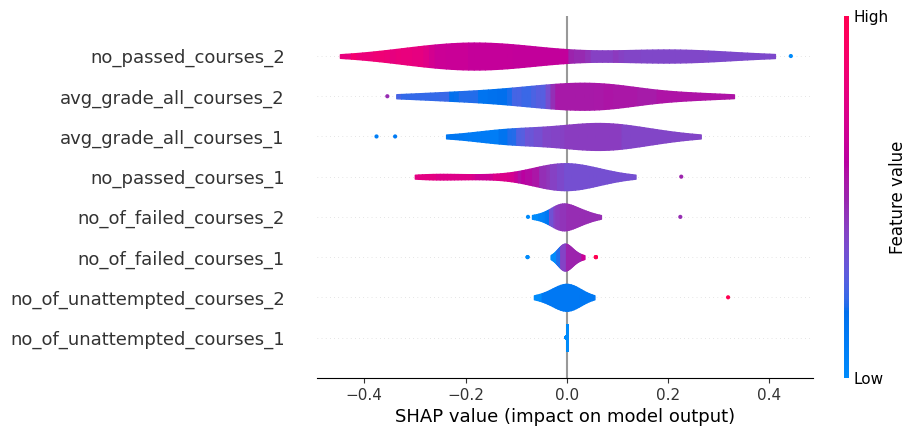

In [78]:
shap.plots.violin(shap_values2[...,1], show=True)

In [79]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2[...,1], link='logit')

In [80]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=14, link='logit', model_name='dt')

Student index 14 grades:
                             grades
no_passed_courses_2             0.0
no_of_failed_courses_2          1.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         5.0
no_passed_courses_1             1.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         2.7
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [81]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=6, link='logit', model_name='dt')

Student index 6 grades:
                             grades
no_passed_courses_2             4.0
no_of_failed_courses_2          0.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         1.6
no_passed_courses_1             3.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         2.4
Status: 0, Prediction: [0], Probability [0]: 1.000, Probability [1]: 0.000


In [82]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=19, link='logit', model_name='dt')

Student index 19 grades:
                             grades
no_passed_courses_2             6.0
no_of_failed_courses_2          0.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         2.0
no_passed_courses_1             4.0
no_of_failed_courses_1          1.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         2.3
Status: 0, Prediction: [0], Probability [0]: 0.791, Probability [1]: 0.209


In [83]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=6, link='logit', model_name='dt')

Student index 6 grades:
                             grades
no_passed_courses_2             4.0
no_of_failed_courses_2          0.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         1.6
no_passed_courses_1             3.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         2.4
Status: 0, Prediction: [0], Probability [0]: 1.000, Probability [1]: 0.000


## BHT semester 3

In [124]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(BHT_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
hpo3 = ModelTrainer(random_state=69)
x3, y3 = hpo3.split_data(BHT_3, features_bht3)

Quantity of Drop Out and Degree in THL-1: 
 1: 71 | 0: 95


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 67.47trial/s, best loss: -0.8385227272727273]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            17               02
	 actual 1            08               07

Model parameters:
{'ccp_alpha': 0.019228826894091836, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0013703904926178512, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 69, 'splitter': 'best'}

Balanced acc.: 68.07018%
Validation accuracy.: 70.58824%
Sensitivity score (for 1): 46.66667%
Specificity score (for 0): 89.47368%
F1 score.: 58.33333%
False prediction: 29.41176%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00

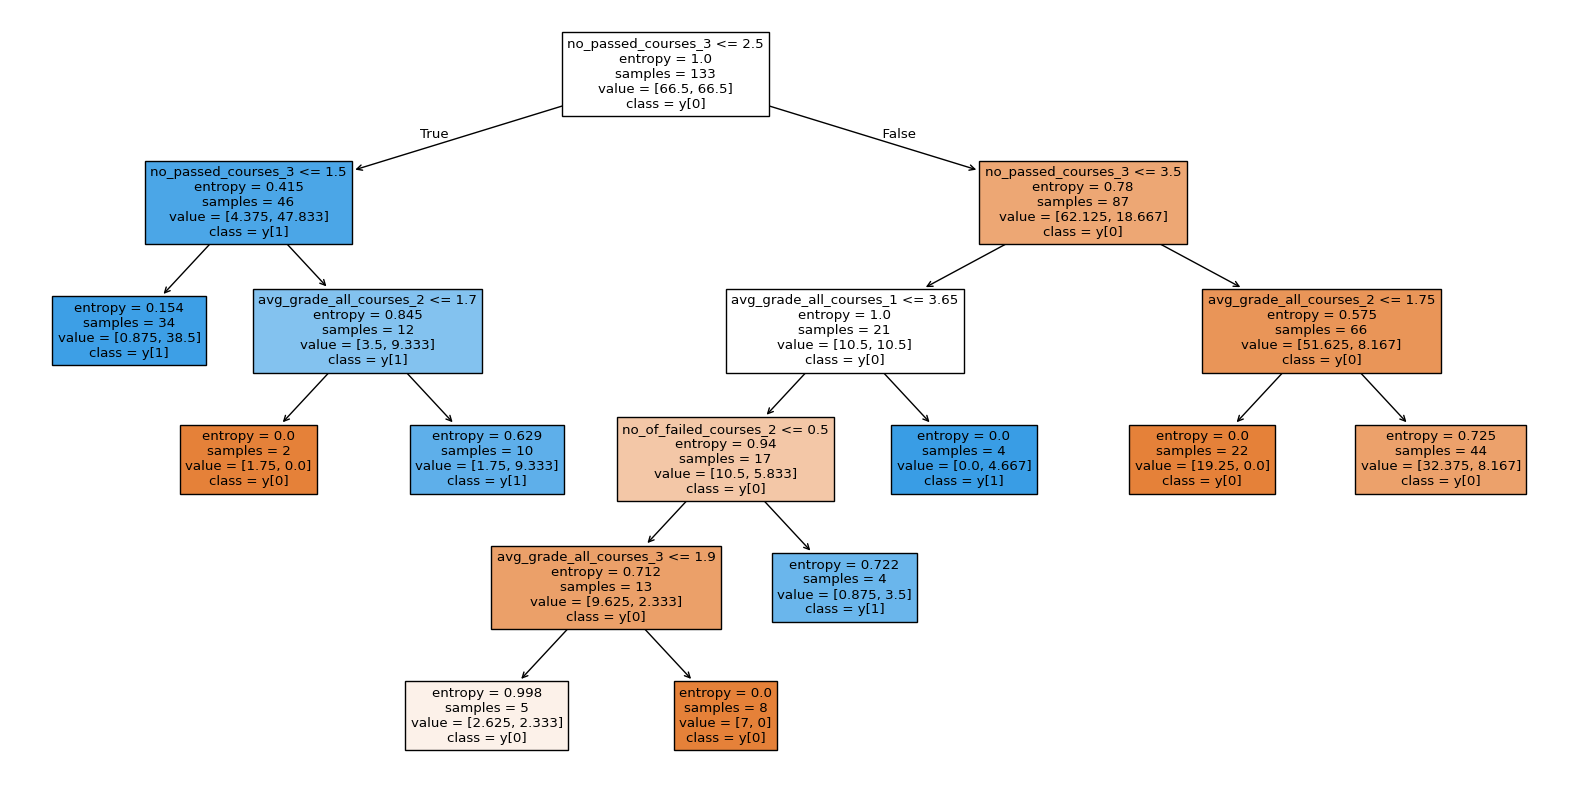

best model is from 2 fold: DecisionTreeClassifier(ccp_alpha=0.017593898731492287, class_weight='balanced',
                       criterion='entropy',
                       min_impurity_decrease=0.024717322813000844,
                       random_state=69)


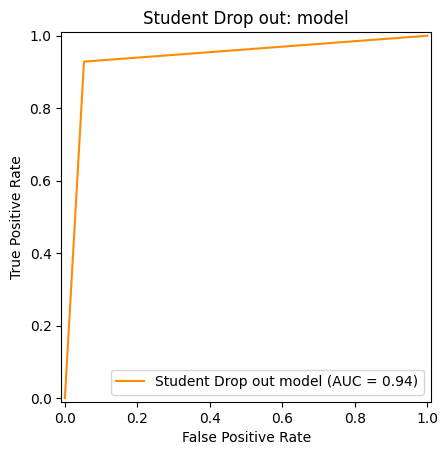

In [127]:
models_3, feature_importance_3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    folds=5,
    algo='dt'
    )

In [128]:
feature_importance_3

,Feature,Importance
0,no_passed_courses_3,0.735955
7,avg_grade_all_courses_2,0.107703
11,avg_grade_all_courses_1,0.068402
5,no_of_failed_courses_2,0.044669
3,avg_grade_all_courses_3,0.043271
1,no_of_failed_courses_3,0.000000
2,no_of_unattempted_courses_3,0.000000
4,no_passed_courses_2,0.000000
6,no_of_unattempted_courses_2,0.000000
8,no_passed_courses_1,0.000000


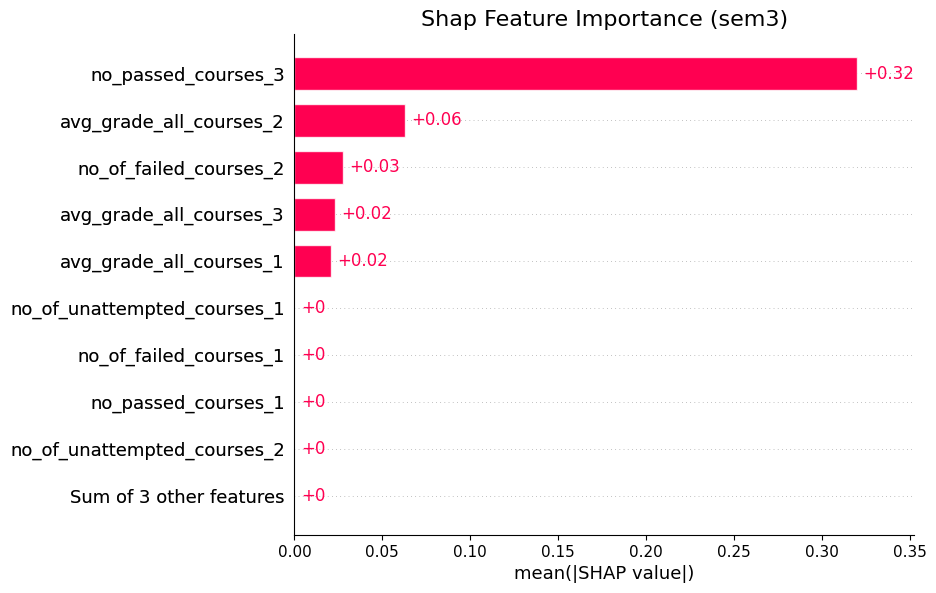

In [129]:
## Shap Global explainations
import shap
explainer3 = shap.TreeExplainer(models_3['model'], models_3['x_train'])
shap_values3 = explainer3(models_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3[..., 1])

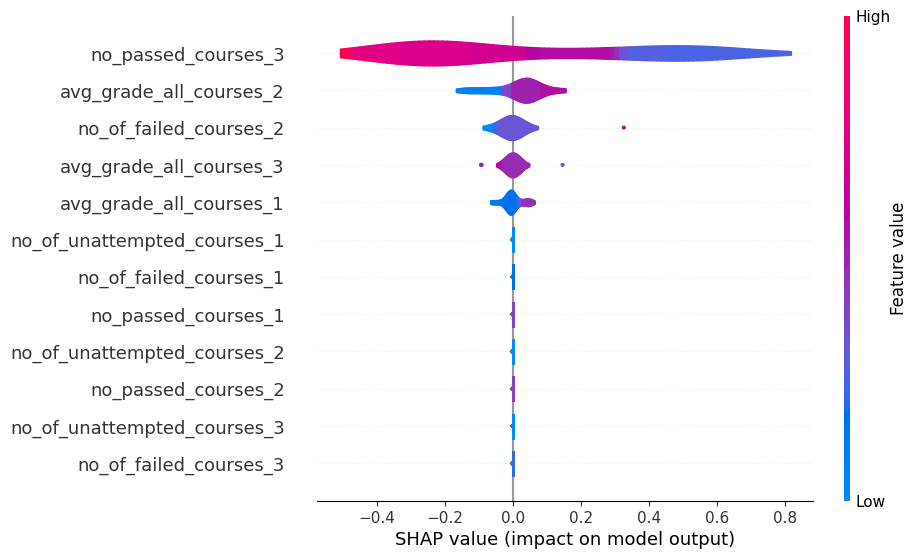

In [130]:
shap.plots.violin(shap_values3[..., 1], show=True)

In [131]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3[..., 1], link='identity')

In [132]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=1, link='identity', model_name='dt')

Student index 1 grades:
                             grades
no_passed_courses_3             3.0
no_of_failed_courses_3          0.0
no_of_unattempted_courses_3     0.0
avg_grade_all_courses_3         1.6
no_passed_courses_2             7.0
no_of_failed_courses_2          0.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         1.3
no_passed_courses_1             1.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         2.0
Status: 0, Prediction: [0], Probability [0]: 0.529, Probability [1]: 0.471


In [133]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=4, link='identity', model_name='dt')

Student index 4 grades:
                             grades
no_passed_courses_3             2.0
no_of_failed_courses_3          0.0
no_of_unattempted_courses_3     0.0
avg_grade_all_courses_3         2.8
no_passed_courses_2             0.0
no_of_failed_courses_2          0.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         5.1
no_passed_courses_1             0.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         5.1
Status: 1, Prediction: [1], Probability [0]: 0.158, Probability [1]: 0.842


In [134]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=14, link='identity', model_name='dt')

Student index 14 grades:
                             grades
no_passed_courses_3             1.0
no_of_failed_courses_3          2.0
no_of_unattempted_courses_3     0.0
avg_grade_all_courses_3         4.6
no_passed_courses_2             2.0
no_of_failed_courses_2          1.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         3.3
no_passed_courses_1             3.0
no_of_failed_courses_1          2.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         3.5
Status: 1, Prediction: [1], Probability [0]: 0.022, Probability [1]: 0.978


In [135]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=24, link='identity', model_name='dt')

Student index 24 grades:
                             grades
no_passed_courses_3            15.0
no_of_failed_courses_3          0.0
no_of_unattempted_courses_3     0.0
avg_grade_all_courses_3         2.8
no_passed_courses_2             0.0
no_of_failed_courses_2          0.0
no_of_unattempted_courses_2     1.0
avg_grade_all_courses_2         0.0
no_passed_courses_1             0.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         5.1
Status: 1, Prediction: [0], Probability [0]: 1.000, Probability [1]: 0.000


## BHT semester 4

In [136]:
# Count occurrences of each unique value in the 'status' column
counter_4 = Counter(BHT_4['status'])
print(f'Quantity of Drop Out and Degree in THL-4: \n 1: {counter_4[1]} | 0: {counter_4[0]}')
hpo4 = ModelTrainer(random_state=74)
x4, y4 = hpo4.split_data(BHT_4, features_bht4)

Quantity of Drop Out and Degree in THL-4: 
 1: 59 | 0: 95


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 64.64trial/s, best loss: -0.7909722222222222]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            17               02
	 actual 1            06               06

Model parameters:
{'ccp_alpha': 0.006351659723404669, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.016452323123237363, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 74, 'splitter': 'best'}

Balanced acc.: 69.73684%
Validation accuracy.: 74.19355%
Sensitivity score (for 1): 50.00000%
Specificity score (for 0): 89.47368%
F1 score.: 60.00000%
False prediction: 25.80645%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:

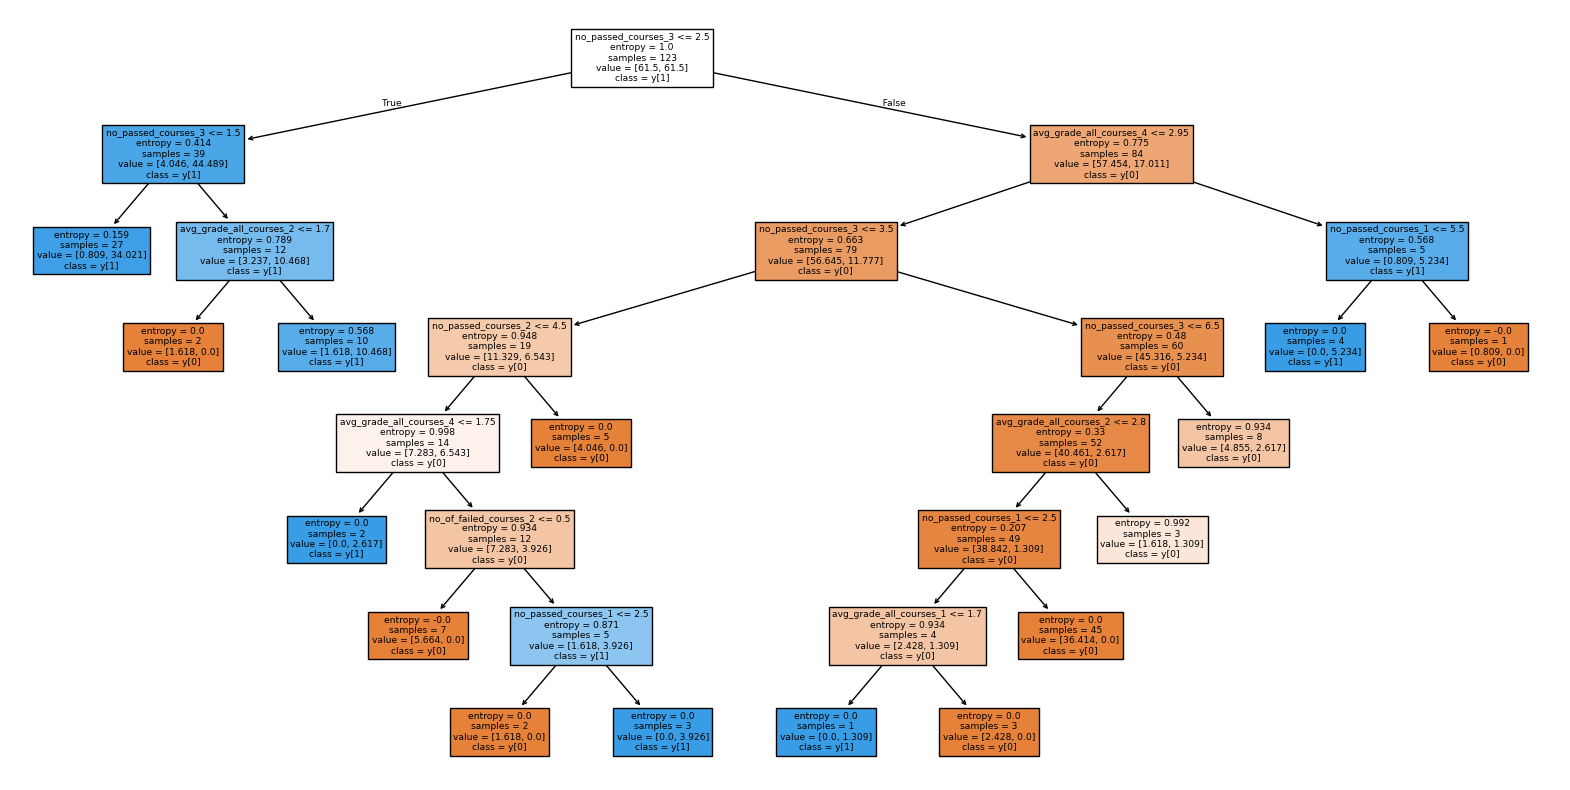

best model is from 4 fold: DecisionTreeClassifier(ccp_alpha=0.012264584611661689, class_weight='balanced',
                       criterion='entropy',
                       min_impurity_decrease=0.02385039185298717,
                       random_state=74)


,Feature,Importance
4,no_passed_courses_3,0.557036
12,no_passed_courses_1,0.130006
3,avg_grade_all_courses_4,0.122062
11,avg_grade_all_courses_2,0.069044
9,no_of_failed_courses_2,0.056024
15,avg_grade_all_courses_1,0.034662
8,no_passed_courses_2,0.031166
0,no_passed_courses_4,0.000000
1,no_of_failed_courses_4,0.000000
2,no_of_unattempted_courses_4,0.000000


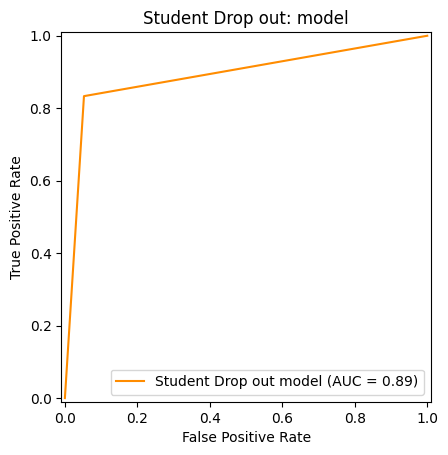

In [141]:
models_4, feature_importance_4 = hpo4.cross_validation_hpo(
    x=x4, y=y4,
    search_space=search_space, 
    folds=5,
    algo='dt'
    )
feature_importance_4

In [142]:
feature_importance_4

,Feature,Importance
4,no_passed_courses_3,0.557036
12,no_passed_courses_1,0.130006
3,avg_grade_all_courses_4,0.122062
11,avg_grade_all_courses_2,0.069044
9,no_of_failed_courses_2,0.056024
15,avg_grade_all_courses_1,0.034662
8,no_passed_courses_2,0.031166
0,no_passed_courses_4,0.000000
1,no_of_failed_courses_4,0.000000
2,no_of_unattempted_courses_4,0.000000


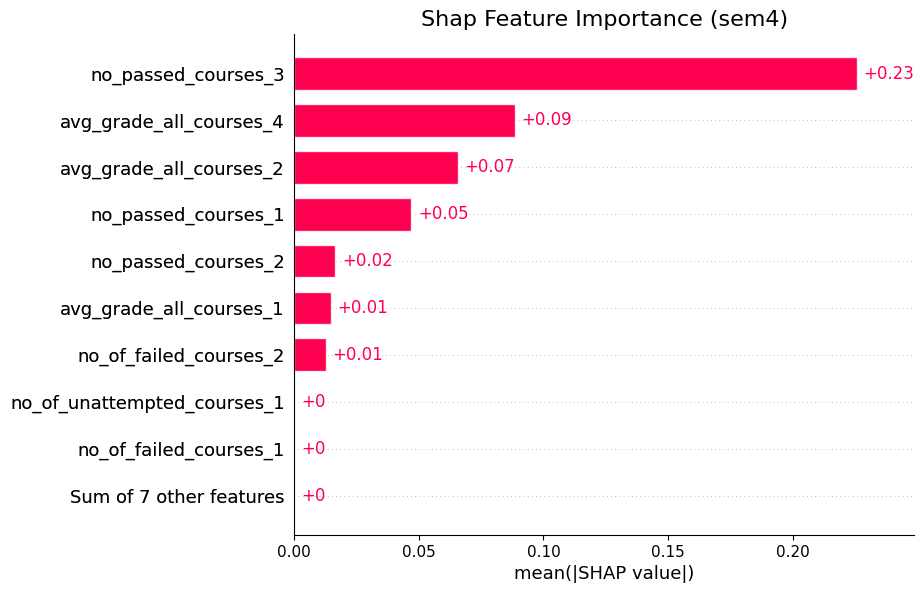

In [143]:
## Shap Global explainations
import shap
explainer4 = shap.TreeExplainer(models_4['model'], models_4['x_train'])
shap_values4 = explainer4(models_4['x_test'])

plt.title('Shap Feature Importance (sem4)', fontsize=16)
shap.plots.bar(shap_values4[..., 1])


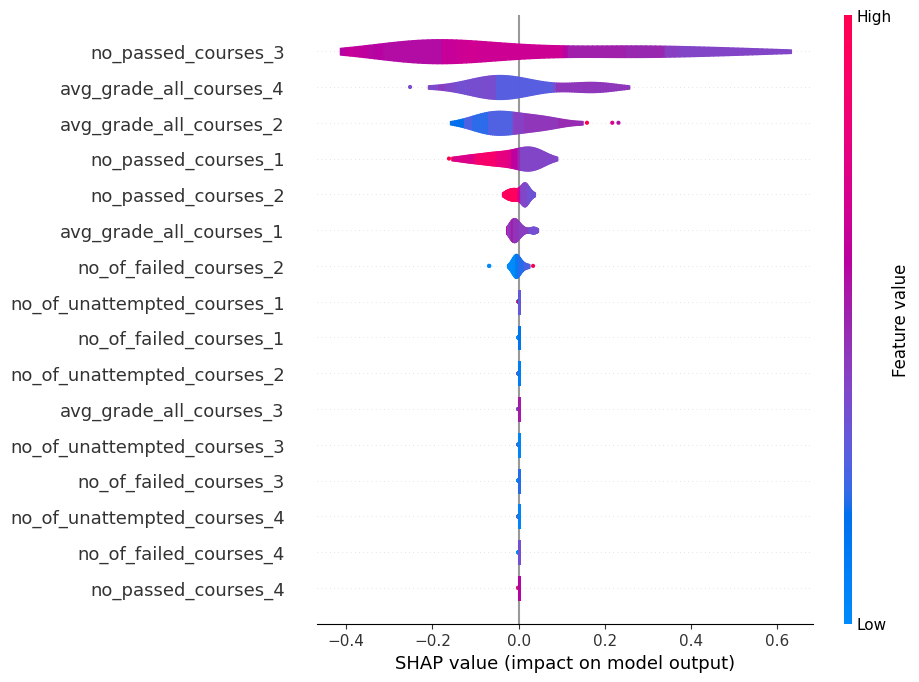

In [144]:
shap.plots.violin(shap_values4[..., 1], show=True)

In [145]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values4[..., 1], link='identity')

In [146]:
hpo4.plot_shap_force(model=models_4, shap_values=shap_values4, student_index=1, link='identity', model_name='dt')

Student index 1 grades:
                             grades
no_passed_courses_4             6.0
no_of_failed_courses_4          0.0
no_of_unattempted_courses_4     0.0
avg_grade_all_courses_4         1.8
no_passed_courses_3             6.0
no_of_failed_courses_3          0.0
no_of_unattempted_courses_3     0.0
avg_grade_all_courses_3         3.0
no_passed_courses_2             6.0
no_of_failed_courses_2          0.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         1.8
no_passed_courses_1             6.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         2.2
Status: 0, Prediction: [0], Probability [0]: 1.000, Probability [1]: 0.000


In [147]:
hpo4.plot_shap_force(model=models_4, shap_values=shap_values4, student_index=3, link='identity', model_name='dt')


Student index 3 grades:
                             grades
no_passed_courses_4             5.0
no_of_failed_courses_4          0.0
no_of_unattempted_courses_4     0.0
avg_grade_all_courses_4         3.1
no_passed_courses_3             2.0
no_of_failed_courses_3          0.0
no_of_unattempted_courses_3     0.0
avg_grade_all_courses_3         2.8
no_passed_courses_2             0.0
no_of_failed_courses_2          0.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         5.1
no_passed_courses_1             0.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         5.1
Status: 1, Prediction: [1], Probability [0]: 0.134, Probability [1]: 0.866


In [148]:
hpo4.plot_shap_force(model=models_4, shap_values=shap_values4, student_index=17, link='identity', model_name='dt')

Student index 17 grades:
                             grades
no_passed_courses_4             3.0
no_of_failed_courses_4          0.0
no_of_unattempted_courses_4     0.0
avg_grade_all_courses_4         1.8
no_passed_courses_3             3.0
no_of_failed_courses_3          0.0
no_of_unattempted_courses_3     0.0
avg_grade_all_courses_3         2.0
no_passed_courses_2             3.0
no_of_failed_courses_2          0.0
no_of_unattempted_courses_2     0.0
avg_grade_all_courses_2         1.8
no_passed_courses_1             5.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         1.9
Status: 0, Prediction: [0], Probability [0]: 1.000, Probability [1]: 0.000


In [149]:
hpo4.plot_shap_force(model=models_4, shap_values=shap_values4, student_index=27, link='identity', model_name='dt')

Student index 27 grades:
                             grades
no_passed_courses_4             5.0
no_of_failed_courses_4          0.0
no_of_unattempted_courses_4     0.0
avg_grade_all_courses_4         1.3
no_passed_courses_3             4.0
no_of_failed_courses_3          0.0
no_of_unattempted_courses_3     0.0
avg_grade_all_courses_3         1.4
no_passed_courses_2             1.0
no_of_failed_courses_2          1.0
no_of_unattempted_courses_2     1.0
avg_grade_all_courses_2         3.8
no_passed_courses_1             3.0
no_of_failed_courses_1          0.0
no_of_unattempted_courses_1     0.0
avg_grade_all_courses_1         1.7
Status: 0, Prediction: [0], Probability [0]: 0.553, Probability [1]: 0.447
